<a href="https://colab.research.google.com/github/theAssassin28/HeadlineClassifier/blob/main/Violent_Headline_Classifier_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
# Importing libraries
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
!pip install tensorflow-hub
import tensorflow_hub as hub

In [50]:
url = 'https://raw.githubusercontent.com/theAssassin28/HeadlineClassifier/main/violent_train.txt'
df_not_violent = pd.read_csv(url,sep = "\n",header = None)

In [51]:
url = 'https://raw.githubusercontent.com/theAssassin28/HeadlineClassifier/main/not_violent_train.txt'
df_not_violent = pd.read_csv(url,sep = "\n",header = None)

In [52]:
# Labelling the data - 0 if the given statement is not violent otherwise labelled 1
df_not_violent["labels"] = 0
df_violent["labels"] = 1

In [53]:
# Joining the dataframes
df = pd.concat([df_violent,df_not_violent], ignore_index= True)

In [54]:
# Randomly shuffling the data frame
df = df.sample(frac = 1)

In [55]:
# Installing the tensorflow hub neural network with normalization
hub_layer = hub.KerasLayer("https://tfhub.dev/google/nnlm-en-dim128-with-normalization/2", input_shape=[], dtype=tf.string)

In [56]:
# The model consists of 4 layers - 2 to extract features and one is the hub layer to covert the text. The last layer is the output layer.
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [57]:
# Compiling the model using adam optimizer and a probability density loss function
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

In [58]:
# Fitting the model to the data
history = model.fit(df[0], df["labels"], batch_size = 50, epochs = 20, verbose = 2, validation_split= 0.2, shuffle = True)

Epoch 1/20
98/98 - 1s - loss: 0.5454 - accuracy: 0.9174 - val_loss: 0.5075 - val_accuracy: 0.9728
Epoch 2/20
98/98 - 1s - loss: 0.5143 - accuracy: 0.9753 - val_loss: 0.5030 - val_accuracy: 0.9794
Epoch 3/20
98/98 - 1s - loss: 0.5096 - accuracy: 0.9845 - val_loss: 0.5026 - val_accuracy: 0.9794
Epoch 4/20
98/98 - 1s - loss: 0.5077 - accuracy: 0.9885 - val_loss: 0.5016 - val_accuracy: 0.9819
Epoch 5/20
98/98 - 1s - loss: 0.5075 - accuracy: 0.9876 - val_loss: 0.5006 - val_accuracy: 0.9852
Epoch 6/20
98/98 - 1s - loss: 0.5066 - accuracy: 0.9899 - val_loss: 0.4998 - val_accuracy: 0.9885
Epoch 7/20
98/98 - 1s - loss: 0.5049 - accuracy: 0.9940 - val_loss: 0.5015 - val_accuracy: 0.9810
Epoch 8/20
98/98 - 1s - loss: 0.5059 - accuracy: 0.9909 - val_loss: 0.5001 - val_accuracy: 0.9876
Epoch 9/20
98/98 - 1s - loss: 0.5046 - accuracy: 0.9942 - val_loss: 0.5000 - val_accuracy: 0.9860
Epoch 10/20
98/98 - 1s - loss: 0.5042 - accuracy: 0.9946 - val_loss: 0.5004 - val_accuracy: 0.9876
Epoch 11/20
98/98 -

In [59]:
epochs = history.epoch
histdf = pd.DataFrame(history.history)

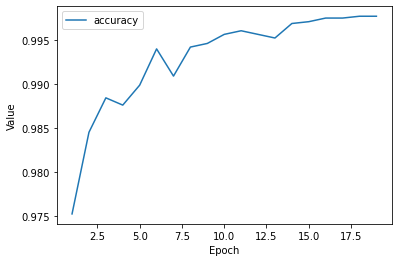

In [60]:
plt.figure()
plt.xlabel("Epoch")
plt.ylabel("Value")
list_of_metrics = ['accuracy']
for m in list_of_metrics:
  x = histdf[m]
  plt.plot(epochs[1:], x[1:], scalex=True, scaley=True, label=m,)

  plt.legend()             #The scale is only of few % points so the 
                           #variations which might be seen are actaully very small